# Reinforcement Learning
# Project 3 - *Policy Gradient & Deep Reinforcement Learning*
## Team name: Wolves of Winterfell
### Team members: Yash Nitin Mantri
### UB Number: 50313926


### Main motivation of the project:

To show that PPO outperforms other online policy gradient methods, and overall strikes a favorable balance between sample complexity and simplicity.

For this, we implement multiple algorithms on 2 environments.

Environment 1 - Cartpole-v1

Environment 2 - LunarLander-v2

### A) Environment 1:

Cartpole-v1

Environment Explanation:

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.

The system is controlled by applying a force of +1 or -1 to the cart.

The pendulum starts upright, and the goal is to prevent it from falling over.

A reward of +1 is provided for every timestep that the pole remains upright.

The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials.

### Algorithms Used:

DQN

Double DQN

A2C (Advantage Actor Critic)

PPO

# 1) - Apply DQN
Environment selected = CartPole-v1

### Basic Idea:

Q-learning requires maintaining Q-table for Q-values. So, we opt for DQN (Deep Q-Learning Algorithm).

DQN leverages a Neural Network to estimate the Q-value function.

The input for the network is the current, while the output is the corresponding Q-value for each of the action.

In [0]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random
from collections import deque

In [0]:
# ENVIRONMENT

# global variables
env_name = "CartPole-v1"
# env_name = "MountainCarContinuous-v0"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85
# print(env.observation_space.shape[0]) # observation_space = 4
# print(env.action_space.n) # action_space = 2

In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        q_update = reward + self.gamma * np.max(model_2.predict(next_state)[0])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=4, activation='relu') )
model_1.add(Dense(2, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=4, activation='relu') )
model_2.add(Dense(2, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0
total_average_reward 8
average_reward 0

 Rewards List Graph:


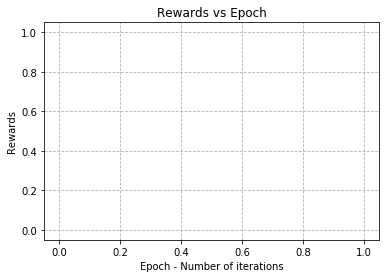


 Rewards List Graph:


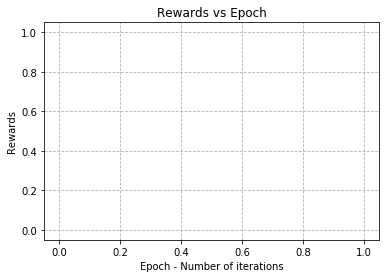

episode 100
total_average_reward 1026
average_reward 10

 Rewards List Graph:


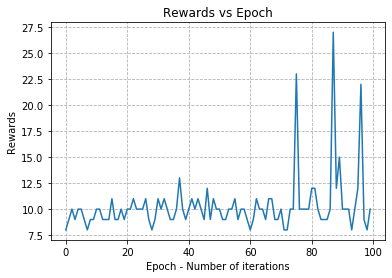


 Rewards List Graph:


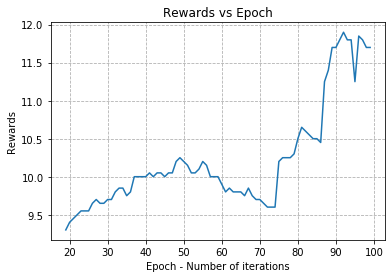

episode 200
total_average_reward 2242
average_reward 22

 Rewards List Graph:


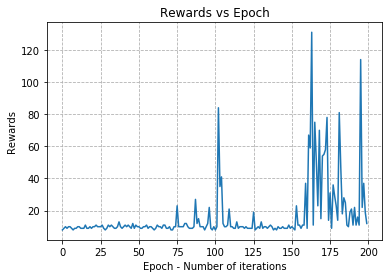


 Rewards List Graph:


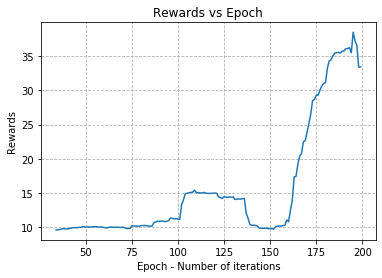

episode 300
total_average_reward 4108
average_reward 41

 Rewards List Graph:


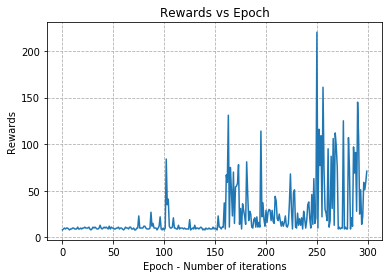


 Rewards List Graph:


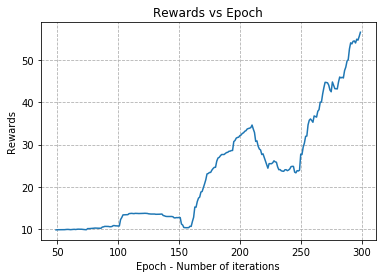

episode 400
total_average_reward 7751
average_reward 77

 Rewards List Graph:


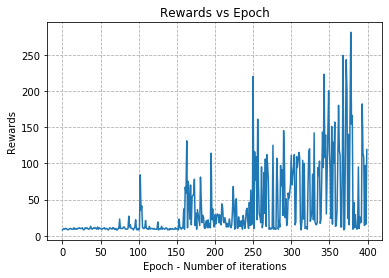


 Rewards List Graph:


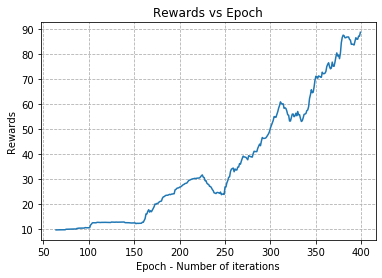


 Rewards List Graph:


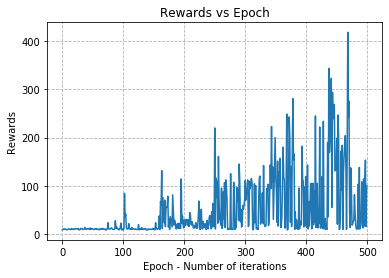


 Rewards List Graph:


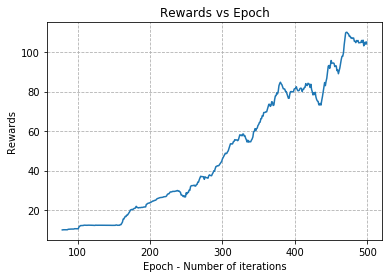


 Epsilons List Graph:


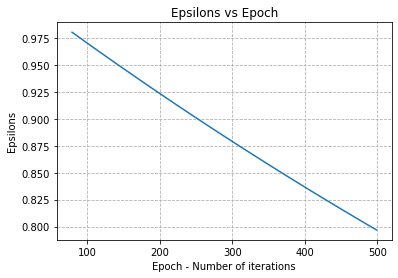

In [28]:
# Training

# Get the training agent and required parameters
dqn_agent = DqnAgent()
dqn_total_rewards_list_env1 = []
epsilons_list = []
epochs = 500
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005
total_average_reward = 0

# Main Algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 4])

  total_reward = 0
  terminate = False
  while terminate == False:  
    action=dqn_agent.step(state, epsilon)
    next_state,reward,terminate,info = env.step(action)
    reward=np.sign(reward)
    next_state = np.reshape(next_state, [1, 4])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    total_reward += reward
    total_average_reward += reward
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
  
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)
    print ("total_average_reward %d"%total_average_reward)
    average_reward = total_average_reward/100
    total_average_reward = 0
    print ("average_reward %d"%average_reward)
    
    print('\n Rewards List Graph:')
    plt.plot(dqn_total_rewards_list_env1)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()

    df = pd.DataFrame(dqn_total_rewards_list_env1, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  dqn_total_rewards_list_env1.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(dqn_total_rewards_list_env1)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(dqn_total_rewards_list_env1, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# 2) Apply Double DQN (DDQN)

Environment selected = CartPole-v1

### Basic Idea:

Deep Q-learning is known to sometimes learn unrealistically high action values because it includes a maximization step over estimated action values, which tends to prefer overestimated to underestimated values.

Double Q-learning reduces overestimations by decomposing the max operation in the target into action selection and action evaluation.

In [0]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random
from collections import deque

In [0]:
# ENVIRONMENT

# global variables
env_name = "CartPole-v1"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85

# print(env.observation_space.shape[0]) # observation_space = 4
# print(env.action_space.n) # action_space = 2

In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience Replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        max_q_update = np.argmax(model_1.predict(next_state))
        q_update = reward + self.gamma * (model_2.predict(next_state)[0][max_q_update])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=4, activation='relu') )
model_1.add(Dense(2, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=4, activation='relu') )
model_2.add(Dense(2, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0

 Rewards List Graph:


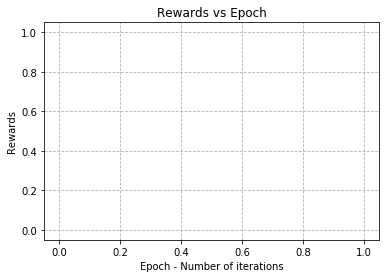

episode 100

 Rewards List Graph:


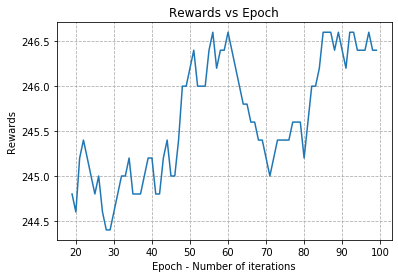

episode 200

 Rewards List Graph:


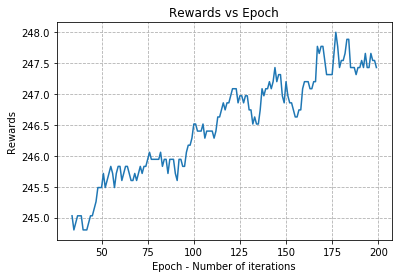

episode 300

 Rewards List Graph:


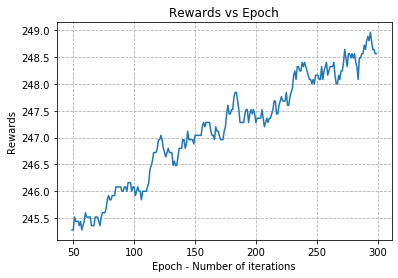

episode 400

 Rewards List Graph:


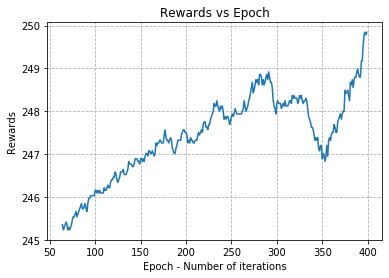

episode 500

 Rewards List Graph:


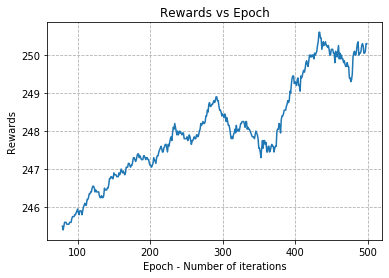

episode 600

 Rewards List Graph:


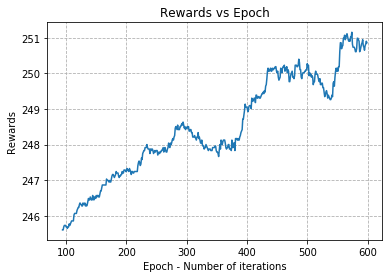

episode 700

 Rewards List Graph:


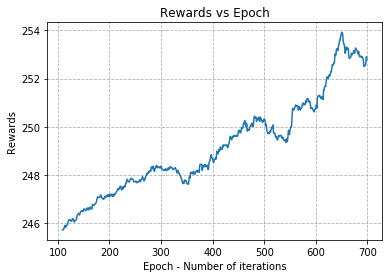

episode 800

 Rewards List Graph:


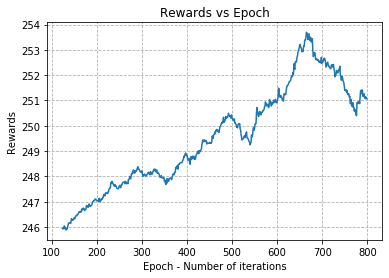

episode 900

 Rewards List Graph:


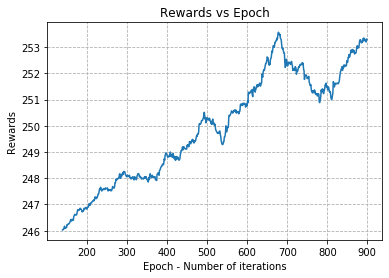


 Rewards List Graph:


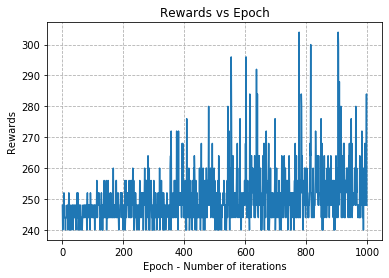


 Rewards List Graph:


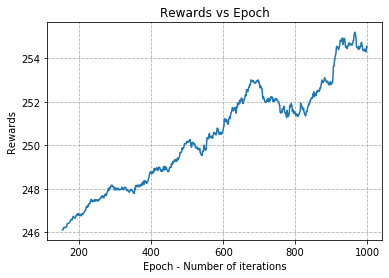


 Epsilons List Graph:


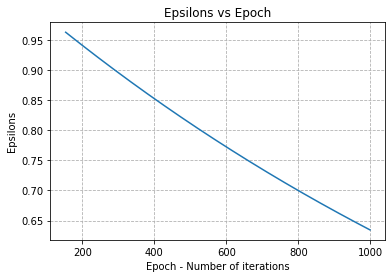

In [33]:
# Training

# get training agent and initialize required parameters
dqn_agent = DqnAgent()
double_dqn_total_rewards_list_env1 = []
epsilons_list = []
epochs = 1000
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005

# Main algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 4])
  total_reward = 0
  terminate = False
  
  while terminate == False:  
    action=dqn_agent.step(state,epsilon)
    next_state,reward,terminate,info = env.step(action)
    total_reward += reward
    if terminate:
      reward = 210 + total_reward
    else:
      reward=np.sign(reward)
    total_reward += reward
    next_state = np.reshape(next_state, [1, 4])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
    
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)   
    df = pd.DataFrame(double_dqn_total_rewards_list_env1, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  double_dqn_total_rewards_list_env1.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(double_dqn_total_rewards_list_env1)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(double_dqn_total_rewards_list_env1, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# 3) Apply Advantage Actor Critic (A2C)

Environment selected = CartPole-v1

### Basic Idea:

1) Actor Advantage Critic(A2C) model is a popular model among policy gradient models.

2) In reinforcement learning, we have the agent moving through various states by taking actions to maximize it's reward.

3) The term “actor-critic” is best thought of as a framework or a class of algorithms satisfying the criteria that there exists parameterized actors and critics.

4) The actor is the policy πθ(a∣s) with parameters θ which conducts actions in an environment. The critic computes value functions to help assist the actor in learning. These are usually the state value, state-action value, or advantage value, denoted as V(s), Q(s,a), and A(s,a), respectively.

5) A2C takes in a state and generates two outputs: State value(Given by the "critic") and the policy(Given by the "actor").

6) A normal Deep Reinforcement model maps states to actions and/or states to state values. And A2C model does both.



### Algorithm Explanation:

1) The algorithm is an actor-critic based algorithm. Which means, it has two networks to train - An actor network, which predicts action based on the current state. The other network known as Critic network, evaluates the state and action. This is the case for all actor-critic networks.

2) A2C consists of a master network and worker networks.

3) We run 5 steps in parallel on each worker.

4) Each worker returns 5 (s, a, r, s).

5) This data is used to update the master network.

6) Since the update is done synchronously, only one copy of the network is required.

7) Variability comes from the fact that each worker has it's own (different) environment.(eg. Their start states might be different).

In [0]:
import gym
import pylab
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [0]:
# ENVIRONMENT
env_name = "CartPole-v1"

# global variables
env = gym.make(env_name)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
gamma = 0.975
learning_rate = 0.0002

In [0]:
class A2CAgent:
  # Initialize the agent
  def __init__(self):
    # Get the actor and critic models
    self.actor = self.actorModel()
    self.critic = self.criticModel()

  # Actor model
  def actorModel(self):
    model_1 = Sequential()
    model_1.add(Dense(256, input_dim=state_size, activation='relu') )
    model_1.add(Dense(action_size, input_dim=256, activation='softmax') )
    model_1.compile(optimizer=Adam(lr= learning_rate),loss='categorical_crossentropy')
    return model_1

  # Critic model
  def criticModel(self):
    model_2 = Sequential()
    model_2.add(Dense(256, input_dim=state_size, activation='relu') )
    model_2.add(Dense(1, input_dim=256, activation='linear') )
    model_2.compile(optimizer=Adam(lr= learning_rate),loss='mse')
    return model_2

  # Select action
  def get_action(self,state):
    policy = self.actor.predict(state,batch_size=1).flatten()
    return np.random.choice(action_size,1,p=policy)[0]

  # Update the model
  def train_model(self, state, action, q_value, next_state, terminate):
    # Initialize the policy targets matrix
    target = np.zeros((1,1))
    # Initialize the advantages matrix
    advantages = np.zeros((1,action_size))
    # Get value for current state
    value = self.critic.predict(state)[0]
    # Get value for next state
    next_value = self.critic.predict(next_state)[0]

    # update the advantages and value tables after termination
    if terminate:
      advantages[0][action] = q_value - value
      target[0][0] = q_value
    else:
      advantages[0][action] = q_value + gamma*(next_value) - value
      target[0][0] = q_value + gamma*next_value

    # Once we terminate the episode, we then update the weights
    self.actor.fit(state,advantages,epochs=1,verbose=0)
    self.critic.fit(state,target,epochs=1,verbose=0)

episode 0
total reward 19

 Rewards List Graph:


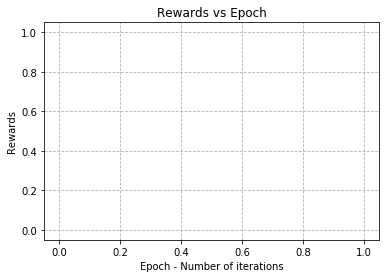

episode 100
total reward 10

 Rewards List Graph:


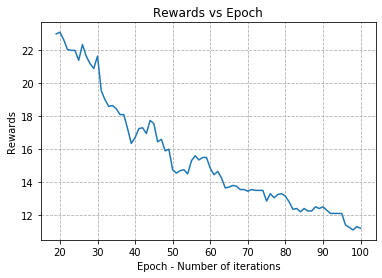

episode 200
total reward 11

 Rewards List Graph:


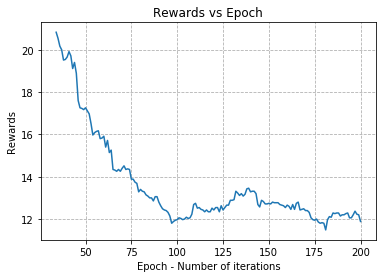

episode 300
total reward 24

 Rewards List Graph:


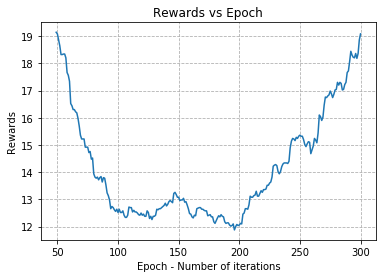

episode 400
total reward 71

 Rewards List Graph:


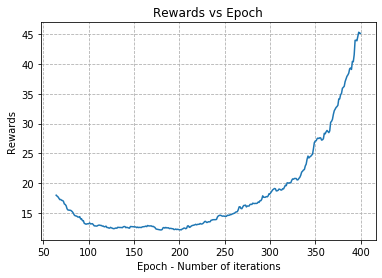

episode 500
total reward 44

 Rewards List Graph:


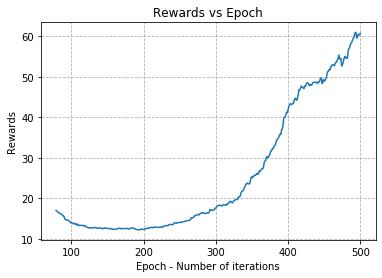

episode 600
total reward 84

 Rewards List Graph:


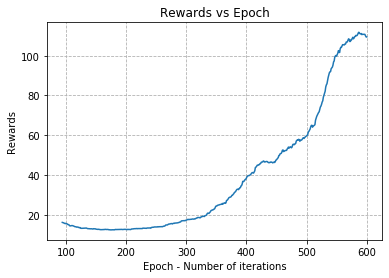

episode 700
total reward 500

 Rewards List Graph:


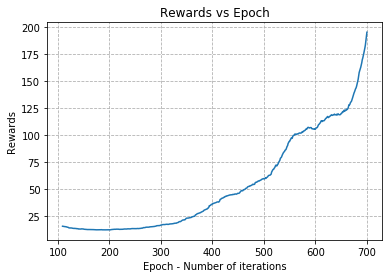


 Rewards List Graph:


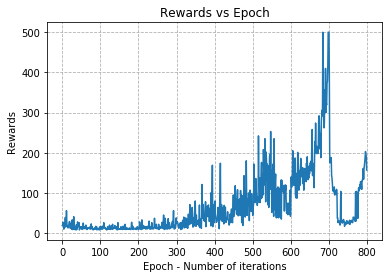

In [37]:

number_of_episodes = 800
window = 5
a2c_total_rewards_list_env1 = []
total_average_reward = 0
agent = A2CAgent()

# Main Logic
for counter in range(number_of_episodes):
  total_reward = 0
  terminate = False
  state = env.reset()
  state = np.reshape(state,[1,state_size])

  while not terminate:
    action = agent.get_action(state)
    next_state, reward, terminate, info = env.step(action)
    next_state = np.reshape(next_state,[1,state_size])
    agent.train_model(state,action,reward,next_state,terminate)
    total_reward += reward
    state = next_state

    if terminate:
      a2c_total_rewards_list_env1.append(total_reward)
    
  if counter % 100 == 0:
    print ("episode %d"%counter)
    print ("total reward %d"%total_reward)

    df = pd.DataFrame(a2c_total_rewards_list_env1, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(a2c_total_rewards_list_env1)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

# 4) Proximal Policy Optimization (PPO)

Environment selected = CartPole-v1

### Basic Idea:

1) Proximal Policy Optimization (PPO) performs comparably or better than state-of-the-art approaches while being much simpler to implement and tune.

2) Q-learning (with function approximation) fails on many simple problems and is poorly understood, vanilla policy gradient methods have poor data efficiency and robustness; and trust region policy optimization (TRPO) is relatively complicated, and is not compatible with architectures that include noise (such as dropout) or parameter sharing (between the policy and value function, or with auxiliary tasks).

3) PPO adds a soft constraint that can be optimized by a first-order optimizer. We may make some bad decisions once a while but it strikes a good balance on the speed of the optimization.

4) It uses multiple epochs of stochastic gradient ascent to perform each policy update. These methods have the stability and reliability of trust-region methods but are much simpler to implement.

5) Here, we maintain two policy networks. The first one is the current policy that we want to refine. The second is the policy that we last used to collect samples.



In [0]:
import numpy as np
import gym
from keras.models import Model
from keras.layers import Input, Dense
from keras import backend as K
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [0]:
# Initialize environment and global variables
env = 'CartPole-v1'
episodes = 6000
clipping_loss = 0.2
epochs = 10
noise = 1.0 # Exploration noise
gamma = 0.9
window = 10

buffer_size = 2048
batch_size = 256
number_of_actions = 2
number_of_states = 4
hidden_layer_nodes = 256
number_of_layers = 2
entropy_loss = 0.005
lr = 0.0001

dummy_action, dummy_value = np.zeros((1, number_of_actions)), np.zeros((1, 1))

In [0]:
class Agent:
  # Initialize agent
  def __init__(self):
    self.critic = self.criticModel()
    self.actor = self.actorModel()
    self.env = gym.make(env)
    print('action_space = ', self.env.action_space, 'observation_space = ', self.env.observation_space)
    self.episode = 0
    self.observation = self.env.reset()
    self.select_best_action = False
    self.reward = []
    self.reward_over_time = []
    self.gradient_steps = 0
    self.total_actor_loss = []
    self.total_critic_loss = []
    self.ppo_total_reward = []

  # PPO - loss function
  def ppoLoss(self,advantage, old_prediction):
    def loss(y_true, y_pred):
      pi_theta = K.sum(y_true * y_pred, axis=-1)
      old_pi_theta = K.sum(y_true * old_prediction, axis=-1)
      r = pi_theta/(old_pi_theta)
      return -K.mean(K.minimum(r * advantage, K.clip(r, min_value=1 - clipping_loss, max_value=1 + clipping_loss) * advantage) + 
                    entropy_loss * -(pi_theta * K.log(pi_theta)))
    return loss

  # Actor model
  def actorModel(self):
    state_input = Input(shape=(number_of_states,))
    advantage = Input(shape=(1,))
    old_prediction = Input(shape=(number_of_actions,))
    x = Dense(hidden_layer_nodes, activation='tanh')(state_input)
    for _ in range(number_of_layers - 1):
      x = Dense(hidden_layer_nodes, activation='tanh')(x)
    out_actions = Dense(number_of_actions, activation='softmax', name='output')(x)

    model1 = Model(inputs=[state_input, advantage, old_prediction], outputs=[out_actions])
    model1.compile(optimizer=Adam(lr=lr),
                  loss=[self.ppoLoss(
                      advantage=advantage,
                      old_prediction=old_prediction)])
    model1.summary()

    return model1

  # Critic model
  def criticModel(self):
    state_input = Input(shape=(number_of_states,))
    x = Dense(hidden_layer_nodes, activation='tanh')(state_input)
    for _ in range(number_of_layers - 1):
      x = Dense(hidden_layer_nodes, activation='tanh')(x)
    out_value = Dense(1)(x)

    model2 = Model(inputs=[state_input], outputs=[out_value])
    model2.compile(optimizer=Adam(lr=lr), loss='mse')
    return model2

  # Reset environment
  def resetEnvironment(self):
    self.episode += 1
    if self.episode % 100 == 0:
      self.select_best_action = True
    else:
      self.select_best_action = False
    self.observation = self.env.reset()
    self.reward = []
    self.window = 2

  # Select Action
  def getAction(self):
    p = self.actor.predict([self.observation.reshape(1, number_of_states), dummy_value, dummy_action])
    if self.select_best_action is False:
      action = np.random.choice(number_of_actions, p=np.nan_to_num(p[0])) # random action
    else:
      action = np.argmax(p[0]) # action based on actor (selecting best action)
    action_matrix = np.zeros(number_of_actions)
    action_matrix[action] = 1
    return action, action_matrix, p

  # Update Reward
  def updateReward(self):
    for j in range(len(self.reward) - 2, -1, -1):
      self.reward[j] += self.reward[j + 1] * gamma

  # Update Agent
  def updateAgent(self):
    batch = [[], [], [], []]
    temp_data = [[], [], []]
    while len(batch[0]) < buffer_size:
      action, action_matrix, predicted_action = self.getAction()
      observation, reward, done, info = self.env.step(action)
      self.reward.append(reward)

      temp_data[0].append(self.observation)
      temp_data[1].append(action_matrix)
      temp_data[2].append(predicted_action)
      self.observation = observation

      if done:
        self.updateReward()
        if self.select_best_action is False:
          for i in range(len(temp_data[0])):
            obs, action, pred = temp_data[0][i], temp_data[1][i], temp_data[2][i]
            r = self.reward[i]
            batch[0].append(obs)
            batch[1].append(action)
            batch[2].append(pred)
            batch[3].append(r)
        temp_data = [[], [], []]
        self.resetEnvironment()

    obs, action, pred, reward = np.array(batch[0]), np.array(batch[1]), np.array(batch[2]), np.reshape(np.array(batch[3]), (len(batch[3]), 1))
    pred = np.reshape(pred, (pred.shape[0], pred.shape[2]))
    return obs, action, pred, reward

  # Main Logic
  def run(self):
    while self.episode < episodes:
      obs, action, pred, reward = self.updateAgent()
      print('reward sum')
      print(np.array(reward).sum())
      self.ppo_total_reward.append(np.array(reward).sum()/100)

      obs, action, pred, reward = obs[:buffer_size], action[:buffer_size], pred[:buffer_size], reward[:buffer_size]
      old_prediction = pred
      pred_values = self.critic.predict(obs)

      advantage = reward - pred_values

      actor_loss = self.actor.fit([obs, advantage, old_prediction], [action], batch_size=batch_size, shuffle=True, epochs=epochs, verbose=False)
      critic_loss = self.critic.fit([obs], [reward], batch_size=batch_size, shuffle=True, epochs=epochs, verbose=False)
      
      self.total_actor_loss.append(actor_loss.history['loss'][-1])
      self.total_critic_loss.append(critic_loss.history['loss'][-1])

      self.gradient_steps += 1
    
    print('self.total_actor_loss')
    print(self.total_actor_loss)
    # print(self.total_actor_loss.shape)
    print('self.total_critic_loss')
    print(self.total_critic_loss)
    # print(self.total_critic_loss.shape)
    print('self.ppo_total_reward')
    print(self.ppo_total_reward)
    # print(self.ppo_total_reward.shape)
    
    # # Plot final graphs
    # print('\n Actor Loss List Graph:')
    # plt.plot(self.total_actor_loss)
    # plt.title("Actor Loss vs Epoch")
    # plt.xlabel('Epoch - Number of iterations')
    # plt.ylabel('Actor Loss')
    # plt.grid(ls='--')
    # plt.show()

    # # Plot final graphs
    # print('\n Critic Loss List Graph:')
    # plt.plot(self.total_critic_loss)
    # plt.title("Critic Loss vs Epoch")
    # plt.xlabel('Epoch - Number of iterations')
    # plt.ylabel('Critic Loss')
    # plt.grid(ls='--')
    # plt.show()

    # Plot final graphs
    print('\n Rewards List Graph:')
    plt.plot(self.ppo_total_reward)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()

    plt.plot([np.mean(self.ppo_total_reward[tr:tr+self.window]) for tr in range(self.window, len(self.ppo_total_reward))])
    plt.title("Rewards vs Epoch")
    plt.xlabel('Episode - Number of iterations')
    plt.ylabel('Total Reward (SMA 2)')
    plt.grid(ls='--')
    plt.show()
    self.window = self.window + 2

  def getTotalReward(self):
    return self.ppo_total_reward

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 2)                 514       
Total params: 67,586
Trainable params: 67,586
Non-trainable params: 0
_________________________________________________________________
action_space =  Discrete(2) observation_space =  Box(4,)
reward sum
14491.745953571048
reward sum
14411.187693522428
reward sum
15473.455839666742
reward sum
15720.232661956223
reward sum
15708.755632752634
reward sum
15947.586917950986
reward sum
15975

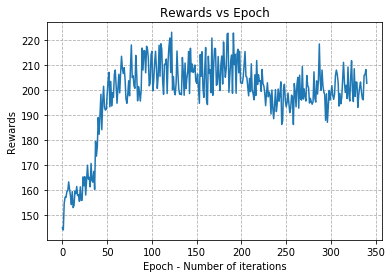

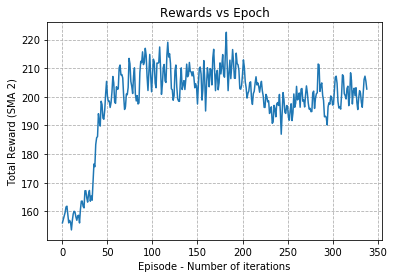

In [41]:
ag = Agent()
ag.run()
ppo_total_reward_env1 = ag.getTotalReward()

### Comparison of graphs

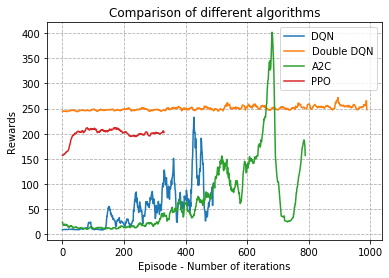

In [60]:

plt.plot([np.mean(dqn_total_rewards_list_env1[tr:tr+window]) for tr in range(window, len(dqn_total_rewards_list_env1))],label="DQN")
plt.plot([np.mean(double_dqn_total_rewards_list_env1[tr:tr+window]) for tr in range(window, len(double_dqn_total_rewards_list_env1))],label="Double DQN")
plt.plot([np.mean(a2c_total_rewards_list_env1[tr:tr+window]) for tr in range(window, len(a2c_total_rewards_list_env1))],label="A2C")
plt.plot([np.mean(ppo_total_reward_env1[tr:tr+window]) for tr in range(window, len(ppo_total_reward_env1))],label="PPO")

plt.title("Comparison of different algorithms")
plt.xlabel('Episode - Number of iterations')
plt.ylabel('Rewards')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

# Implementing all the algorithms on second environment

### B) Environment 2:

LunarLander-v2

Environment Explanation:

Landing pad is always at coordinates (0,0).

Coordinates are the first two numbers in state vector. Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. 

If lander moves away from landing pad it loses reward back. Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points.

Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points.

Landing outside landing pad is possible.

Fuel is infinite, so an agent can learn to fly and then land on its first attempt.

Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

# 1) - Apply DQN
Environment selected = LunarLander-v2

### Basic Idea:

Q-learning requires maintaining Q-table for Q-values. So, we opt for DQN (Deep Q-Learning Algorithm).

DQN leverages a Neural Network to estimate the Q-value function.

The input for the network is the current, while the output is the corresponding Q-value for each of the action.

In [1]:
!pip install box2d-py
!pip install gym[Box_2D]
import Box2D

import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random 

from collections import deque

     |████████████████████████████████| 450kB 4.7MB/s 


Using TensorFlow backend.


In [0]:
# ENVIRONMENT

# global variables
env_name = "LunarLander-v2"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85

# print(env.observation_space.shape[0]) # observation_space = 4
# print(env.action_space.n) # action_space = 2

In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        q_update = reward + self.gamma * np.max(model_2.predict(next_state)[0])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [4]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=8, activation='relu') )
model_1.add(Dense(4, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=8, activation='relu') )
model_2.add(Dense(4, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())



episode 0
total_average_reward -71
average_reward 0

 Rewards List Graph:


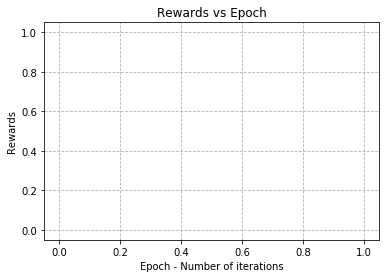


 Rewards List Graph:


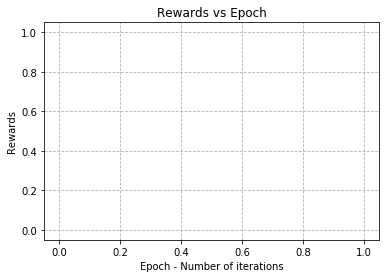

episode 100
total_average_reward -7234
average_reward -72

 Rewards List Graph:


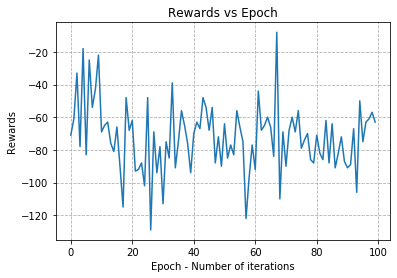


 Rewards List Graph:


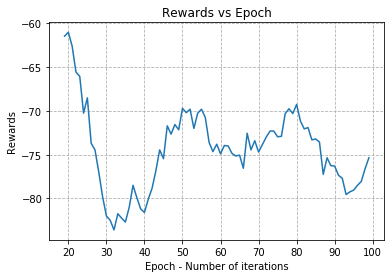

episode 200
total_average_reward -6985
average_reward -69

 Rewards List Graph:


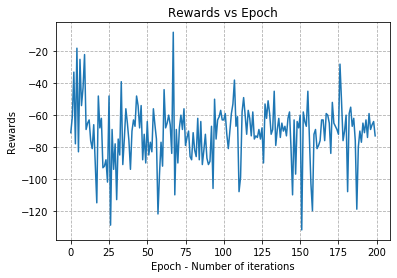


 Rewards List Graph:


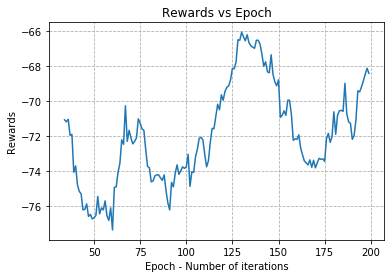

episode 300
total_average_reward -6968
average_reward -69

 Rewards List Graph:


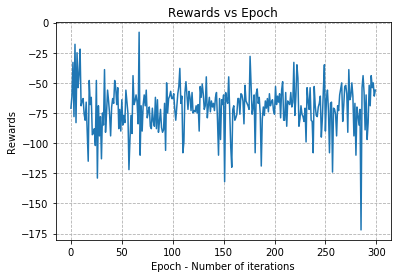


 Rewards List Graph:


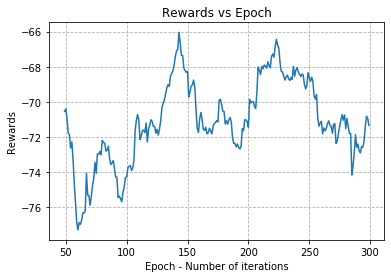

episode 400
total_average_reward -6451
average_reward -64

 Rewards List Graph:


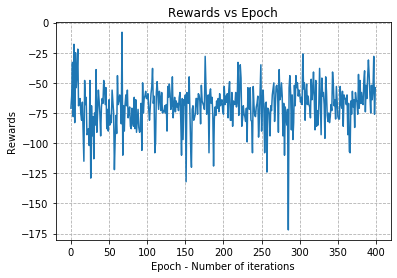


 Rewards List Graph:


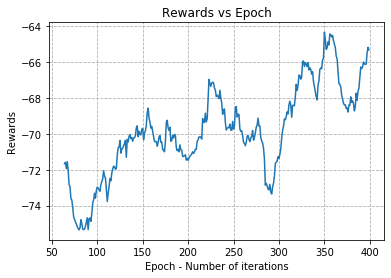


 Rewards List Graph:


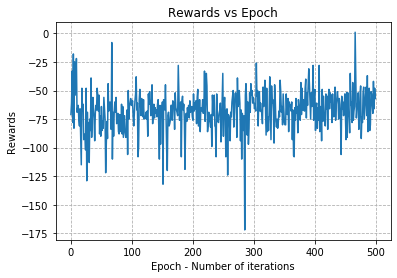


 Rewards List Graph:


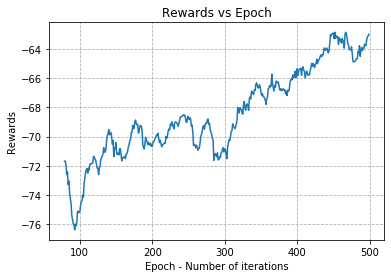


 Epsilons List Graph:


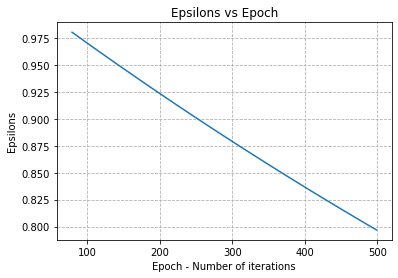

In [5]:
# Training

# Get the training agent and required parameters
dqn_agent = DqnAgent()
dqn_total_rewards_list_env2 = []
epsilons_list = []
epochs = 500
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005
total_average_reward = 0

# Main Algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 8])

  total_reward = 0
  terminate = False
  while terminate == False:  
    action=dqn_agent.step(state, epsilon)
    next_state,reward,terminate,info = env.step(action)
    reward=np.sign(reward)
    next_state = np.reshape(next_state, [1, 8])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    total_reward += reward
    total_average_reward += reward
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
  
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)
    print ("total_average_reward %d"%total_average_reward)
    average_reward = total_average_reward/100
    total_average_reward = 0
    print ("average_reward %d"%average_reward)
    
    print('\n Rewards List Graph:')
    plt.plot(dqn_total_rewards_list_env2)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()

    df = pd.DataFrame(dqn_total_rewards_list_env2, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  dqn_total_rewards_list_env2.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(dqn_total_rewards_list_env2)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(dqn_total_rewards_list_env2, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# 2) Apply Double DQN (DDQN)

Environment selected = LunarLander-v2

### Basic Idea:

Deep Q-learning is known to sometimes learn unrealistically high action values because it includes a maximization step over estimated action values, which tends to prefer overestimated to underestimated values.

Double Q-learning reduces overestimations by decomposing the max operation in the target into action selection and action evaluation.

In [6]:
!pip install box2d-py
!pip install gym[Box_2D]
import Box2D

import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random
from collections import deque

In [0]:
# ENVIRONMENT

# global variables
env_name = "LunarLander-v2"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85

# print(env.observation_space.shape[0]) # observation_space = 4
# print(env.action_space.n) # action_space = 2

In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience Replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        max_q_update = np.argmax(model_1.predict(next_state))
        q_update = reward + self.gamma * (model_2.predict(next_state)[0][max_q_update])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=8, activation='relu') )
model_1.add(Dense(4, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=8, activation='relu') )
model_2.add(Dense(4, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0

 Rewards List Graph:


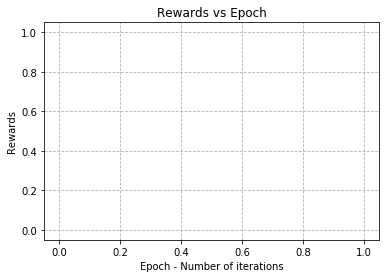

episode 100

 Rewards List Graph:


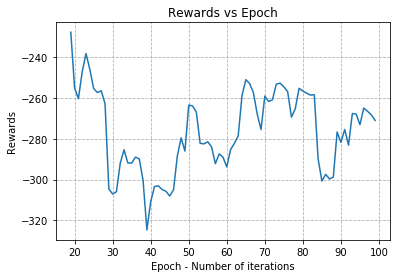

episode 200

 Rewards List Graph:


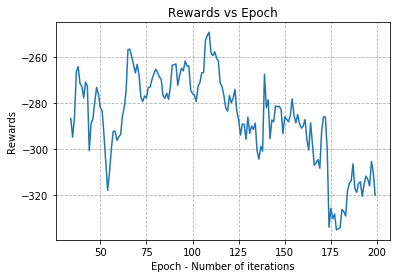

episode 300

 Rewards List Graph:


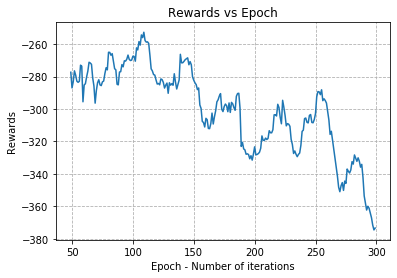

episode 400

 Rewards List Graph:


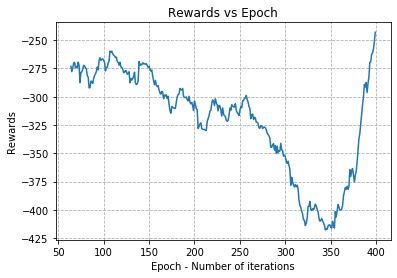

episode 500

 Rewards List Graph:


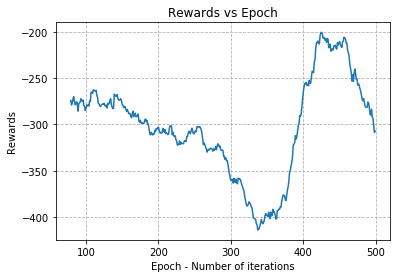

episode 600

 Rewards List Graph:


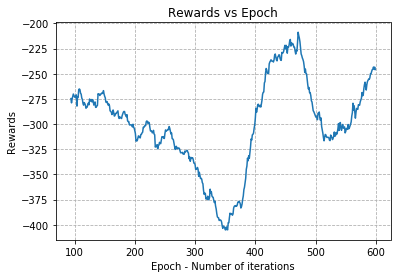

episode 700

 Rewards List Graph:


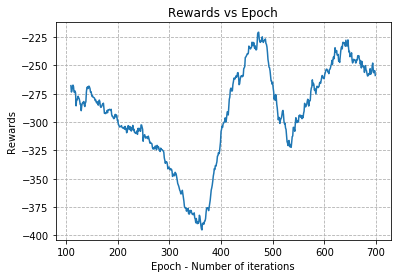

episode 800

 Rewards List Graph:


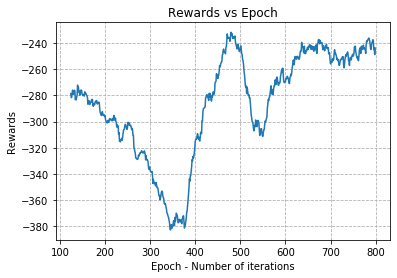

episode 900

 Rewards List Graph:


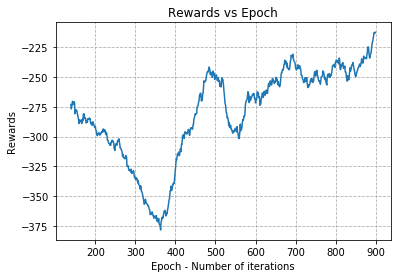


 Rewards List Graph:


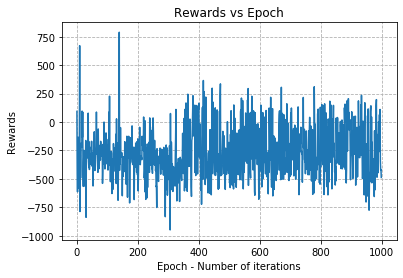


 Rewards List Graph:


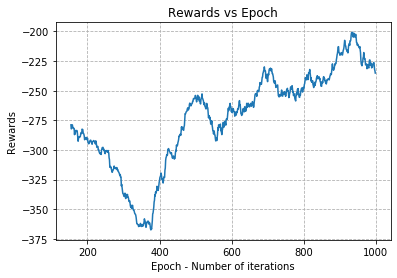


 Epsilons List Graph:


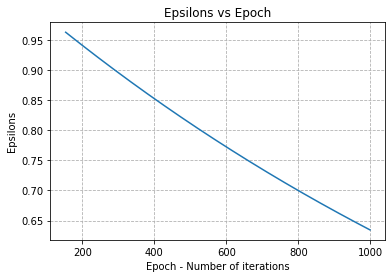

In [10]:
# Training

# get training agent and initialize required parameters
dqn_agent = DqnAgent()
double_dqn_total_rewards_list_env2 = []
epsilons_list = []
epochs = 1000
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005

# Main algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 8])
  total_reward = 0
  terminate = False
  
  while terminate == False:  
    action=dqn_agent.step(state,epsilon)
    next_state,reward,terminate,info = env.step(action)
    total_reward += reward
    if terminate:
      reward = 210 + total_reward
    else:
      reward=np.sign(reward)
    total_reward += reward
    next_state = np.reshape(next_state, [1, 8])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
    
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)   
    df = pd.DataFrame(double_dqn_total_rewards_list_env2, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  double_dqn_total_rewards_list_env2.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(double_dqn_total_rewards_list_env2)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(double_dqn_total_rewards_list_env2, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# 3) Apply Advantage Actor Critic (A2C)

Environment selected = LunarLander-v2

### Basic Idea:

1) Actor Advantage Critic(A2C) model is a popular model among policy gradient models.

2) In reinforcement learning, we have the agent moving through various states by taking actions to maximize it's reward.

3) The term “actor-critic” is best thought of as a framework or a class of algorithms satisfying the criteria that there exists parameterized actors and critics.

4) The actor is the policy πθ(a∣s) with parameters θ which conducts actions in an environment. The critic computes value functions to help assist the actor in learning. These are usually the state value, state-action value, or advantage value, denoted as V(s), Q(s,a), and A(s,a), respectively.

5) A2C takes in a state and generates two outputs: State value(Given by the "critic") and the policy(Given by the "actor").

6) A normal Deep Reinforcement model maps states to actions and/or states to state values. And A2C model does both.



### Algorithm Explanation:

1) The algorithm is an actor-critic based algorithm. Which means, it has two networks to train - An actor network, which predicts action based on the current state. The other network known as Critic network, evaluates the state and action. This is the case for all actor-critic networks.

2) A2C consists of a master network and worker networks.

3) We run 5 steps in parallel on each worker.

4) Each worker returns 5 (s, a, r, s).

5) This data is used to update the master network.

6) Since the update is done synchronously, only one copy of the network is required.

7) Variability comes from the fact that each worker has it's own (different) environment.(eg. Their start states might be different).

In [11]:
!pip install box2d-py
!pip install gym[Box_2D]
import Box2D

import gym
import pylab
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [0]:
# ENVIRONMENT
env_name = "LunarLander-v2"

# global variables
env = gym.make(env_name)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
gamma = 0.975
learning_rate = 0.0002

In [0]:
class A2CAgent:
  # Initialize the agent
  def __init__(self):
    # Get the actor and critic models
    self.actor = self.actorModel()
    self.critic = self.criticModel()

  # Actor model
  def actorModel(self):
    model_1 = Sequential()
    model_1.add(Dense(256, input_dim=state_size, activation='relu') )
    model_1.add(Dense(action_size, input_dim=256, activation='softmax') )
    model_1.compile(optimizer=Adam(lr= learning_rate),loss='categorical_crossentropy')
    return model_1

  # Critic model
  def criticModel(self):
    model_2 = Sequential()
    model_2.add(Dense(256, input_dim=state_size, activation='relu') )
    model_2.add(Dense(1, input_dim=256, activation='linear') )
    model_2.compile(optimizer=Adam(lr= learning_rate),loss='mse')
    return model_2

  # Select action
  def get_action(self,state):
    policy = self.actor.predict(state,batch_size=1).flatten()
    return np.random.choice(action_size,1,p=policy)[0]

  # Update the model
  def train_model(self, state, action, q_value, next_state, terminate):
    # Initialize the policy targets matrix
    target = np.zeros((1,1))
    # Initialize the advantages matrix
    advantages = np.zeros((1,action_size))
    # Get value for current state
    value = self.critic.predict(state)[0]
    # Get value for next state
    next_value = self.critic.predict(next_state)[0]

    # update the advantages and value tables after termination
    if terminate:
      advantages[0][action] = q_value - value
      target[0][0] = q_value
    else:
      advantages[0][action] = q_value + gamma*(next_value) - value
      target[0][0] = q_value + gamma*next_value

    # Once we terminate the episode, we then update the weights
    self.actor.fit(state,advantages,epochs=1,verbose=0)
    self.critic.fit(state,target,epochs=1,verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
episode 0
total reward -124

 Rewards List Graph:


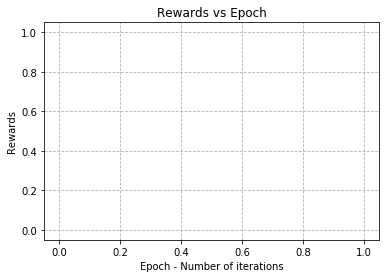

episode 100
total reward -106

 Rewards List Graph:


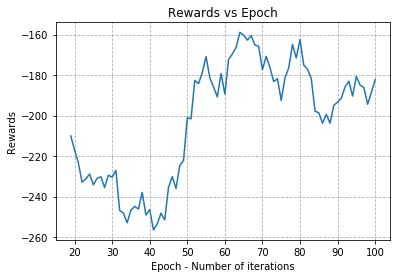

episode 200
total reward 206

 Rewards List Graph:


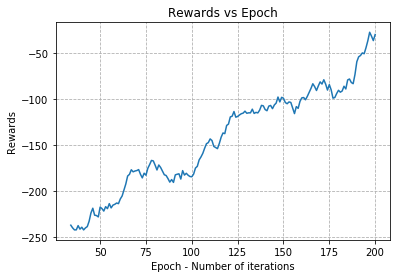

episode 300
total reward -120

 Rewards List Graph:


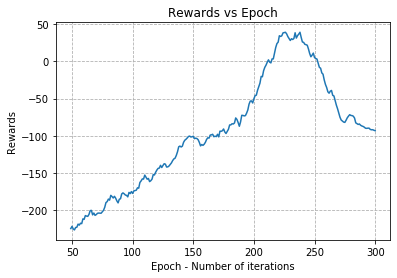

episode 400
total reward -168

 Rewards List Graph:


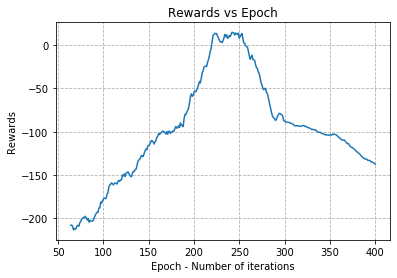

episode 500
total reward -164

 Rewards List Graph:


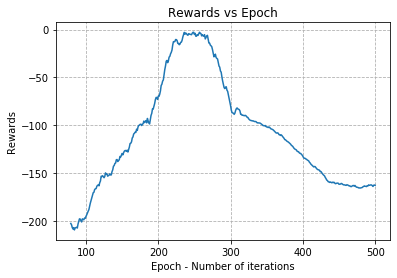

episode 600
total reward -205

 Rewards List Graph:


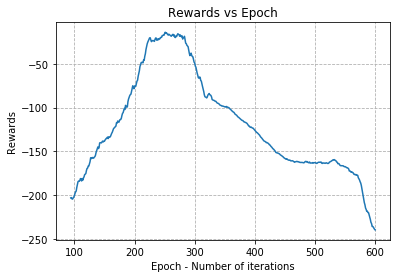

episode 700
total reward -146

 Rewards List Graph:


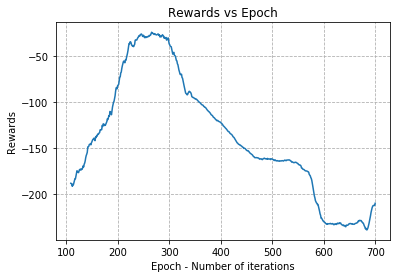


 Rewards List Graph:


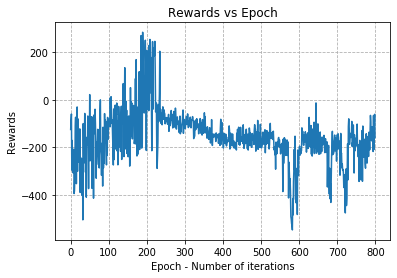

In [14]:

number_of_episodes = 800
window = 5
a2c_total_rewards_list_env2 = []
total_average_reward = 0
agent = A2CAgent()

# Main Logic
for counter in range(number_of_episodes):
  total_reward = 0
  terminate = False
  state = env.reset()
  state = np.reshape(state,[1,state_size])

  while not terminate:
    action = agent.get_action(state)
    next_state, reward, terminate, info = env.step(action)
    next_state = np.reshape(next_state,[1,state_size])
    agent.train_model(state,action,reward,next_state,terminate)
    total_reward += reward
    state = next_state

    if terminate:
      a2c_total_rewards_list_env2.append(total_reward)
    
  if counter % 100 == 0:
    print ("episode %d"%counter)
    print ("total reward %d"%total_reward)

    df = pd.DataFrame(a2c_total_rewards_list_env2, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(a2c_total_rewards_list_env2)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

# 4) Proximal Policy Optimization (PPO)

Environment selected = LunarLander-v2

### Basic Idea:

1) Proximal Policy Optimization (PPO) performs comparably or better than state-of-the-art approaches while being much simpler to implement and tune.

2) Q-learning (with function approximation) fails on many simple problems and is poorly understood, vanilla policy gradient methods have poor data efficiency and robustness; and trust region policy optimization (TRPO) is relatively complicated, and is not compatible with architectures that include noise (such as dropout) or parameter sharing (between the policy and value function, or with auxiliary tasks).

3) PPO adds a soft constraint that can be optimized by a first-order optimizer. We may make some bad decisions once a while but it strikes a good balance on the speed of the optimization.

4) It uses multiple epochs of stochastic gradient ascent to perform each policy update. These methods have the stability and reliability of trust-region methods but are much simpler to implement.

5) Here, we maintain two policy networks. The first one is the current policy that we want to refine. The second is the policy that we last used to collect samples.



In [15]:

!pip install box2d-py
!pip install gym[Box_2D]

import numpy as np
import gym
from keras.models import Model
from keras.layers import Input, Dense
from keras import backend as K
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import Box2D


In [0]:
# Initialize environment and global variables
env = 'LunarLander-v2'
episodes = 6000
clipping_loss = 0.2
epochs = 10
noise = 1.0 # Exploration noise
gamma = 0.9
window = 10

buffer_size = 2048
batch_size = 256
number_of_actions = 4
number_of_states = 8
hidden_layer_nodes = 256
number_of_layers = 2
entropy_loss = 0.005
lr = 0.0001

dummy_action, dummy_value = np.zeros((1, number_of_actions)), np.zeros((1, 1))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 4)                 1028      
Total params: 69,124
Trainable params: 69,124
Non-trainable params: 0
_________________________________________________________________
action_space =  Discrete(4) observation_space =  Box(8,)
reward sum
-44597.322675204545
reward sum
-45830.53818869399
reward sum
-46639.0703391353
reward sum
-58536.47877955982
reward sum
-60517.26430955906
reward sum
-60257.813363335066
reward sum
-724

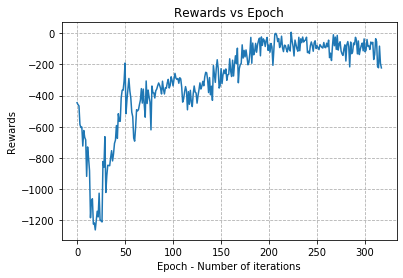

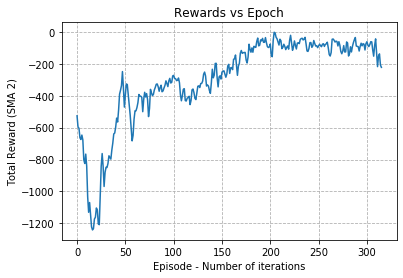

In [17]:
class Agent:
  # Initialize agent
  def __init__(self):
    self.critic = self.criticModel()
    self.actor = self.actorModel()
    self.env = gym.make(env)
    print('action_space = ', self.env.action_space, 'observation_space = ', self.env.observation_space)
    self.episode = 0
    self.observation = self.env.reset()
    self.select_best_action = False
    self.reward = []
    self.reward_over_time = []
    self.gradient_steps = 0
    self.total_actor_loss = []
    self.total_critic_loss = []
    self.ppo_total_reward = []

  # PPO - loss function
  def ppoLoss(self,advantage, old_prediction):
    def loss(y_true, y_pred):
      pi_theta = K.sum(y_true * y_pred, axis=-1)
      old_pi_theta = K.sum(y_true * old_prediction, axis=-1)
      r = pi_theta/(old_pi_theta)
      return -K.mean(K.minimum(r * advantage, K.clip(r, min_value=1 - clipping_loss, max_value=1 + clipping_loss) * advantage) + 
                    entropy_loss * -(pi_theta * K.log(pi_theta)))
    return loss

  # Actor model
  def actorModel(self):
    state_input = Input(shape=(number_of_states,))
    advantage = Input(shape=(1,))
    old_prediction = Input(shape=(number_of_actions,))
    x = Dense(hidden_layer_nodes, activation='tanh')(state_input)
    for _ in range(number_of_layers - 1):
      x = Dense(hidden_layer_nodes, activation='tanh')(x)
    out_actions = Dense(number_of_actions, activation='softmax', name='output')(x)

    model1 = Model(inputs=[state_input, advantage, old_prediction], outputs=[out_actions])
    model1.compile(optimizer=Adam(lr=lr),
                  loss=[self.ppoLoss(
                      advantage=advantage,
                      old_prediction=old_prediction)])
    model1.summary()

    return model1

  # Critic model
  def criticModel(self):
    state_input = Input(shape=(number_of_states,))
    x = Dense(hidden_layer_nodes, activation='tanh')(state_input)
    for _ in range(number_of_layers - 1):
      x = Dense(hidden_layer_nodes, activation='tanh')(x)
    out_value = Dense(1)(x)

    model2 = Model(inputs=[state_input], outputs=[out_value])
    model2.compile(optimizer=Adam(lr=lr), loss='mse')
    return model2

  # Reset environment
  def resetEnvironment(self):
    self.episode += 1
    if self.episode % 100 == 0:
      self.select_best_action = True
    else:
      self.select_best_action = False
    self.observation = self.env.reset()
    self.reward = []
    self.window = 2

  # Select Action
  def getAction(self):
    p = self.actor.predict([self.observation.reshape(1, number_of_states), dummy_value, dummy_action])
    if self.select_best_action is False:
      action = np.random.choice(number_of_actions, p=np.nan_to_num(p[0])) # random action
    else:
      action = np.argmax(p[0]) # action based on actor (selecting best action)
    action_matrix = np.zeros(number_of_actions)
    action_matrix[action] = 1
    return action, action_matrix, p

  # Update Reward
  def updateReward(self):
    for j in range(len(self.reward) - 2, -1, -1):
      self.reward[j] += self.reward[j + 1] * gamma

  # Update Agent
  def updateAgent(self):
    batch = [[], [], [], []]
    temp_data = [[], [], []]
    while len(batch[0]) < buffer_size:
      action, action_matrix, predicted_action = self.getAction()
      observation, reward, done, info = self.env.step(action)
      self.reward.append(reward)

      temp_data[0].append(self.observation)
      temp_data[1].append(action_matrix)
      temp_data[2].append(predicted_action)
      self.observation = observation

      if done:
        self.updateReward()
        if self.select_best_action is False:
          for i in range(len(temp_data[0])):
            obs, action, pred = temp_data[0][i], temp_data[1][i], temp_data[2][i]
            r = self.reward[i]
            batch[0].append(obs)
            batch[1].append(action)
            batch[2].append(pred)
            batch[3].append(r)
        temp_data = [[], [], []]
        self.resetEnvironment()

    obs, action, pred, reward = np.array(batch[0]), np.array(batch[1]), np.array(batch[2]), np.reshape(np.array(batch[3]), (len(batch[3]), 1))
    pred = np.reshape(pred, (pred.shape[0], pred.shape[2]))
    return obs, action, pred, reward

  # Main Logic
  def run(self):
    while self.episode < episodes:
      obs, action, pred, reward = self.updateAgent()
      print('reward sum')
      print(np.array(reward).sum())
      self.ppo_total_reward.append(np.array(reward).sum()/100)

      obs, action, pred, reward = obs[:buffer_size], action[:buffer_size], pred[:buffer_size], reward[:buffer_size]
      old_prediction = pred
      pred_values = self.critic.predict(obs)

      advantage = reward - pred_values

      actor_loss = self.actor.fit([obs, advantage, old_prediction], [action], batch_size=batch_size, shuffle=True, epochs=epochs, verbose=False)
      critic_loss = self.critic.fit([obs], [reward], batch_size=batch_size, shuffle=True, epochs=epochs, verbose=False)
      
      self.total_actor_loss.append(actor_loss.history['loss'][-1])
      self.total_critic_loss.append(critic_loss.history['loss'][-1])

      self.gradient_steps += 1
    
    print('self.total_actor_loss')
    print(self.total_actor_loss)
    # print(self.total_actor_loss.shape)
    print('self.total_critic_loss')
    print(self.total_critic_loss)
    # print(self.total_critic_loss.shape)
    print('self.ppo_total_reward')
    print(self.ppo_total_reward)
    # print(self.ppo_total_reward.shape)
    
    # # Plot final graphs
    # print('\n Actor Loss List Graph:')
    # plt.plot(self.total_actor_loss)
    # plt.title("Actor Loss vs Epoch")
    # plt.xlabel('Epoch - Number of iterations')
    # plt.ylabel('Actor Loss')
    # plt.grid(ls='--')
    # plt.show()

    # # Plot final graphs
    # print('\n Critic Loss List Graph:')
    # plt.plot(self.total_critic_loss)
    # plt.title("Critic Loss vs Epoch")
    # plt.xlabel('Epoch - Number of iterations')
    # plt.ylabel('Critic Loss')
    # plt.grid(ls='--')
    # plt.show()

    # Plot final graphs
    print('\n Rewards List Graph:')
    plt.plot(self.ppo_total_reward)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()

    plt.plot([np.mean(self.ppo_total_reward[tr:tr+self.window]) for tr in range(self.window, len(self.ppo_total_reward))])
    plt.title("Rewards vs Epoch")
    plt.xlabel('Episode - Number of iterations')
    plt.ylabel('Total Reward (SMA 2)')
    plt.grid(ls='--')
    plt.show()
    self.window = self.window + 2

  def getTotalReward(self):
    return self.ppo_total_reward

ag = Agent()
ag.run()
ppo_total_reward_env2 = ag.getTotalReward()

### Comparison of graphs

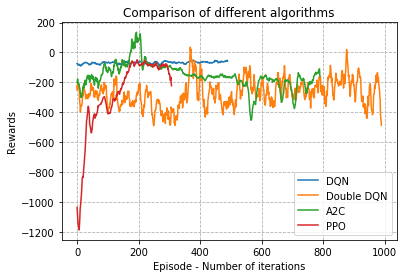

In [23]:
plt.plot([np.mean(dqn_total_rewards_list_env2[tr:tr+window]) for tr in range(window, len(dqn_total_rewards_list_env2))],label="DQN")
plt.plot([np.mean(double_dqn_total_rewards_list_env2[tr:tr+window]) for tr in range(window, len(double_dqn_total_rewards_list_env2))],label="Double DQN")
plt.plot([np.mean(a2c_total_rewards_list_env2[tr:tr+window]) for tr in range(window, len(a2c_total_rewards_list_env2))],label="A2C")
# plt.plot([np.mean(ppo_total_reward_lunar_lander[tr:tr+window]) for tr in range(window, len(ppo_total_reward_lunar_lander))],label="PPO")
plt.plot([np.mean(ppo_total_reward_env2[tr:tr+window]) for tr in range(window, len(ppo_total_reward_env2))],label="PPO")

plt.title("Comparison of different algorithms")
plt.xlabel('Episode - Number of iterations')
plt.ylabel('Rewards')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

### Comparing learning between 2 environments

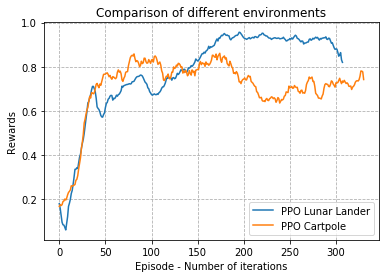

In [65]:
from sklearn.preprocessing import minmax_scale
ppo_total_reward_env1 = minmax_scale(ppo_total_reward_env1, feature_range=(0,1), axis=0)
# ppo_total_reward_lunar_lander = minmax_scale(ppo_total_reward_lunar_lander, feature_range=(0,1), axis=0)
ppo_total_reward_env2 = minmax_scale(ppo_total_reward_env2, feature_range=(0,1), axis=0)

plt.plot([np.mean(ppo_total_reward_env1[tr:tr+window]) for tr in range(window, len(ppo_total_reward_env1))],label="PPO Cartpole")
# # plt.plot([np.mean(ppo_total_reward_lunar_lander[tr:tr+window]) for tr in range(window, len(ppo_total_reward_lunar_lander))],label="PPO Lunar Lander")
plt.plot([np.mean(ppo_total_reward_env2[tr:tr+window]) for tr in range(window, len(ppo_total_reward_env2))],label="PPO Lunar Lander")

plt.title("Comparison of different environments")
plt.xlabel('Episode - Number of iterations')
plt.ylabel('Rewards')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

Environment Explanation:

The inverted pendulum swingup problem is a classic problem in the control literature.

In this version of the problem, the pendulum starts in a random position, and the goal is to swing it up so it stays upright.

### References:

1) https://arxiv.org/pdf/1707.06347.pdf

2) https://medium.com/@jonathan_hui/rl-proximal-policy-optimization-ppo-explained-77f014ec3f12